In [1]:
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep = TRUE)
  require(p, character.only = TRUE, quietly = TRUE)
}

usePackage("data.table") # for fast merging of access log & sar
usePackage("ggplot2")

Sys.setlocale("LC_TIME", "us")

options(stringsAsFactors = FALSE)

[1] "English_United States.1252"

In [3]:
raw <- fread('grep Thread ..\\logs\\win_local_bench.log', 
             sep=",", 
             col.names=c("time", "response_time", "case", "thread", "label"))


tidy <- data.table(raw, do.call(rbind, strsplit(raw$label,"-")))

setnames(tidy, "V3", "thread_num")

tidy$thread_num <- as.numeric(tidy$thread_num)

tidy$time <- as.POSIXct(tidy$time, tz="", format="%Y-%m-%d %H:%M:%OS")

head(tidy)

time,response_time,case,thread,label,V1,V2,thread_num
2018-05-16 11:50:10,0.00000000,started,Thread-0,windows-1000000-5,windows,1000000,5
2018-05-16 11:50:10,0.00000000,started,Thread-1,windows-1000000-5,windows,1000000,5
2018-05-16 11:50:10,0.00000000,started,Thread-2,windows-1000000-5,windows,1000000,5
2018-05-16 11:50:10,0.00000000,started,Thread-3,windows-1000000-5,windows,1000000,5
2018-05-16 11:50:10,0.00000000,started,Thread-4,windows-1000000-5,windows,1000000,5
2018-05-16 11:50:10,0.07699275,read,Thread-0,windows-1000000-5,windows,1000000,5


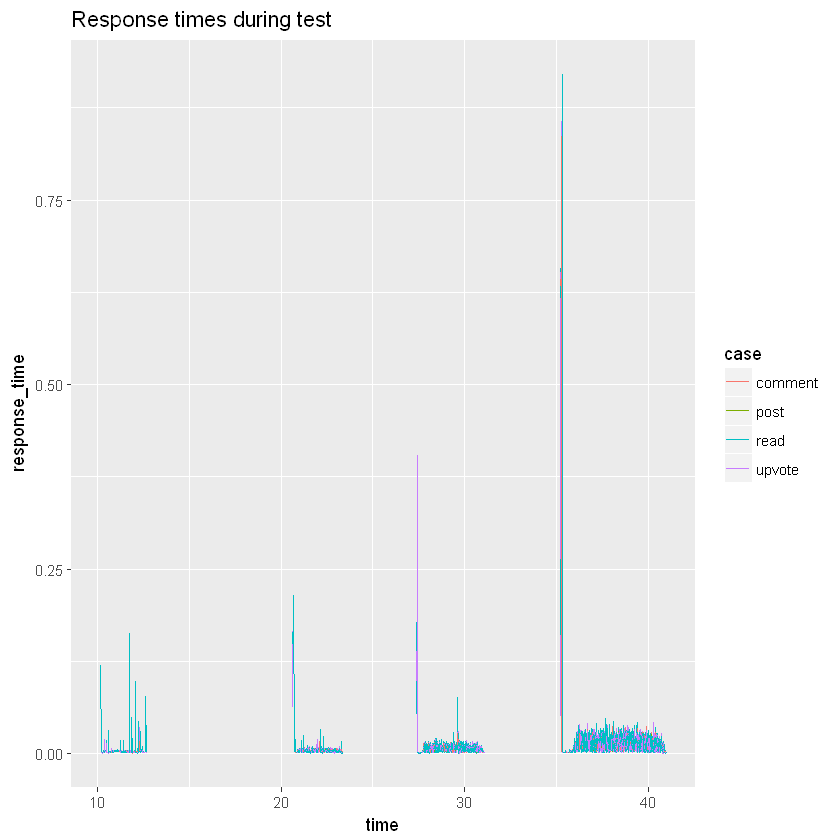

In [4]:
  ggplot(data = tidy[case != "finished"][case != "started"], 
         aes(x=time, 
             y=response_time, 
             group=thread_num, 
             colour=case)) + 
    geom_line() + ggtitle(paste0("Response times during test")) 

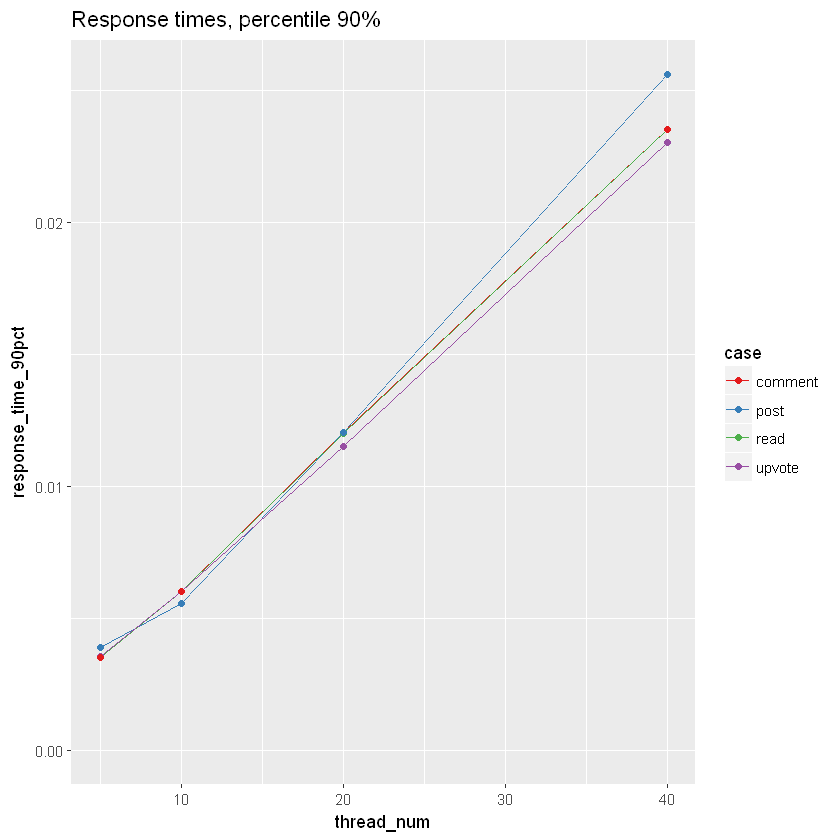

In [5]:
  ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), by="case,thread_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=case, 
             colour=case)) + ylim(0,NA)+ scale_color_brewer(palette="Set1") +
    geom_line() + geom_point() + ggtitle(paste0("Response times, percentile 90%")) 

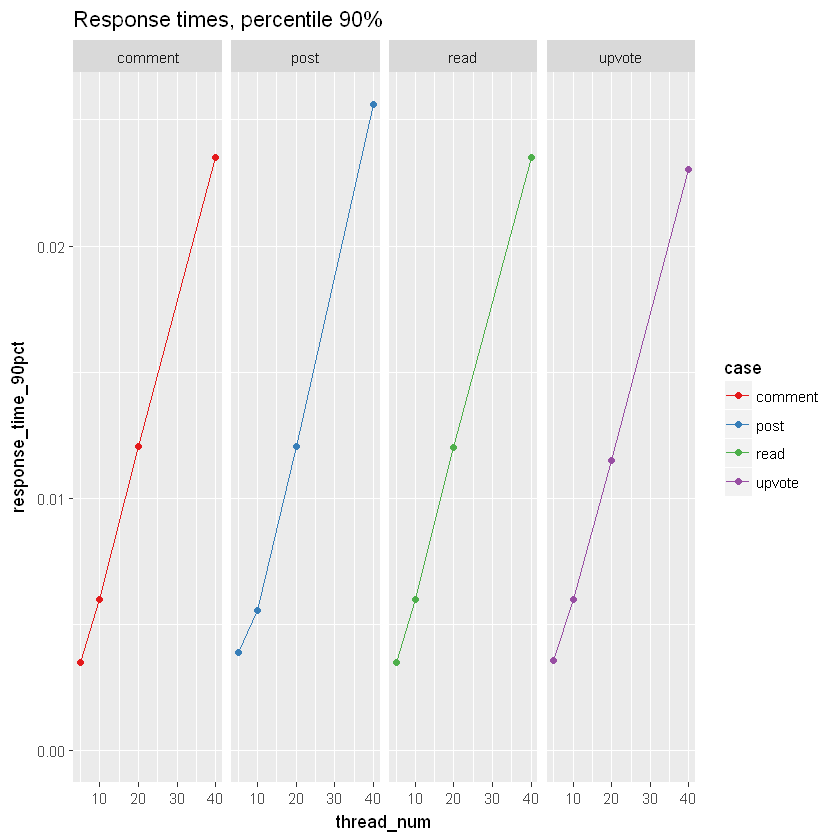

In [6]:
 ggplot(data = tidy[case != "finished"][case != "started"][,list(response_time_90pct = quantile(response_time, 0.9)), by="case,thread_num"], 
         aes(x=thread_num, 
             y=response_time_90pct, 
             group=case, 
             colour=case)) + ylim(0,NA)+ scale_color_brewer(palette="Set1") + facet_grid( . ~ case ) + 
    geom_line() + geom_point()+ ggtitle(paste0("Response times, percentile 90%")) 